<a href="https://colab.research.google.com/github/claudiagiraldo/Proyecto/blob/main/01%20-%20exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Exploración de datos: Proyecto Visas**
Por: Claudia Yaneth Giraldo Vergara

C.C. 1001745178

**Aclaración**

Debido al gran tamaño de la base de datos original descargada de Kaggle ('H-1B_Disclosure_Data_FY17.csv') se ha creado una nueva base de datos de menor tamaño ('Visas_reducida') a partir de la base de datos original con 10000 filas seleccionadas de manera aleatoria, esto con el fin de acelerar la carga del archivo a Google Colab.

In [26]:
# Importación de bibliotecas a utilizar
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Lectura y limpieza de datos**

In [10]:
# Carga de datos 
url = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/Visas_reducida.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,354115,I-200-17078-371645,CERTIFIED,2017-03-19,2017-03-23,H-1B,2017-09-15,2020-09-14,HSK TECHNOLOGIES INC,NaN,...,N,N,NaN,NaN,NaN,MIAMI,MIAMI-DADE,FL,33131,NaN
1,520870,I-200-17174-799976,CERTIFIED,2017-06-27,2017-07-03,H-1B,2017-06-30,2020-06-29,ACCENTURE LLP,NaN,...,N,N,NaN,NaN,NaN,ATLANTA,FULTON,GA,30308,NaN
2,435723,I-200-17095-547953,CERTIFIED,2017-04-14,2017-04-20,H-1B,2017-08-05,2020-08-04,TATA CONSULTANCY SERVICES LIMITED,NaN,...,Y,N,Y,NaN,NaN,SAN ANTONIO,BEXAR,TX,78288,NaN
3,27054,I-200-16295-236668,CERTIFIED,2016-10-21,2016-10-27,H-1B,2016-11-07,2019-11-06,"URBAN SCIENCE APPLICATIONS, INC.",NaN,...,N,N,NaN,NaN,NaN,DETROIT,WAYNE,MI,48243,NaN
4,87671,I-200-16356-398915,CERTIFIED,2016-12-21,2016-12-28,H-1B,2017-02-03,2020-02-02,"TECH MAHINDRA (AMERICAS),INC.",NaN,...,Y,N,Y,Y,NaN,RICHARDSON,COLLIN,TX,75082,NaN


###**Significado de cada columna**


*   CASE_NUMBER:Identificador único asignado a cada solicitud
*   CASE_STATUS: Última decisión significativa. Los valores válidos incluyen "certificado" (visa laboral aceptada), "certificado-retirado" (solicitud que fue retirada antes de dar la última decisión), "denegado" y "retirado".
*   CASE_SUBMITTED: Fecha y hora en la que se envió la solicitud.
*   DECISION_DATE: Fecha en la que se registró el último hecho o decisión significativo.
*   VISA_CLASS: Indica el tipo de solicitud temporal presentada para su tramitación. R = H-1B; A = E-3 australiano; C = H-1B1 Chile; S = H-1B1 Singapur. También denominado "Programa" en años anteriores.
*   EMPLOYMENT_START_DATE: Fecha de inicio de la actividad laboral.
*   EMPLOYMENT_END_DATE: Fecha de finalización del contrato.
*   EMPLOYER_NAME: Nombre del empresario que presenta la solicitud de condiciones laborales.
*   EMPLOYER_BUSINESS_DBA: Nombre comercial o razón social del empresario que presenta la solicitud de condición laboral, si procede.
*   EMPLOYER_ADDRESS, EMPLOYER_CITY, EMPLOYER_STATE, EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY, EMPLOYER_PROVINCE, EMPLOYER_PHONE, EMPLOYER_PHONE_EXT: Datos de contacto del empresario que solicita la certificación de trabajo temporal temporal.
*   AGENT_REPRESENTING_EMPLOYER: Y = El empresario está representado por un agente o abogado; N = El empresario no está representado por un agente o abogado.
*   AGENT_ATTORNEY_NAME: Nombre del agente o abogado que presenta una solicitud H-1B en nombre del empleador.
*   AGENT_ATTORNEY_CITY: Información de la ciudad para el Agente o Abogado que presenta una solicitud H-1B en en nombre del empleador.
*   AGENT_ATTORNEY_STATE: Datos del agente o abogado que presenta una solicitud H-1B en nombre del empleador.
*   JOB_TITLE: Título del puesto.
*   SOC_CODE: Código ocupacional asociado al puesto de trabajo para el que se solicita condición de trabajo temporal, según la clasificación del Standard Occupational (SOC).
*   Elemento de lista
*   Elemento de lista

















###****

In [ ]:
# Limpieza de datos
# Se elimina la columna 'VISA_CLASS' al asumir que todas las solicitudes de visas son de tipo H1-1B 
data = data.drop('VISA_CLASS', axis = 1)

# Se calcula el porcentaje de valores faltantes para cada columna
nan_porcentajes = data.isna().mean() * 100
print(nan_porcentajes)

In [ ]:
# Se define el parámetro de descarte en 40%, si la columna tiene más de 40% de datos faltantes, entonces se descarta
columnas = nan_porcentajes[nan_porcentajes > 40].index
data = data.drop(columnas, axis=1)

# Se completan los datos faltantes utilizando la media para columnas numéricas y la moda para columnas tipo string
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())
    elif pd.api.types.is_string_dtype(data[col]):
        data[col] = data[col].fillna(data[col].mode()[0])

# Se puede rectificar que no haya valores faltantes
nan_porcentajes = (data.isna().sum())*100/len(data)
print(nan_porcentajes)

## **Exploración de datos**

### **Vista de los casos de forma general**

En primer lugar se quiere observar como se distribuyen las decisiones finales a las solicitudes que hacen las personas al gobierno de Estados Unidos para obtener una visa laboral.

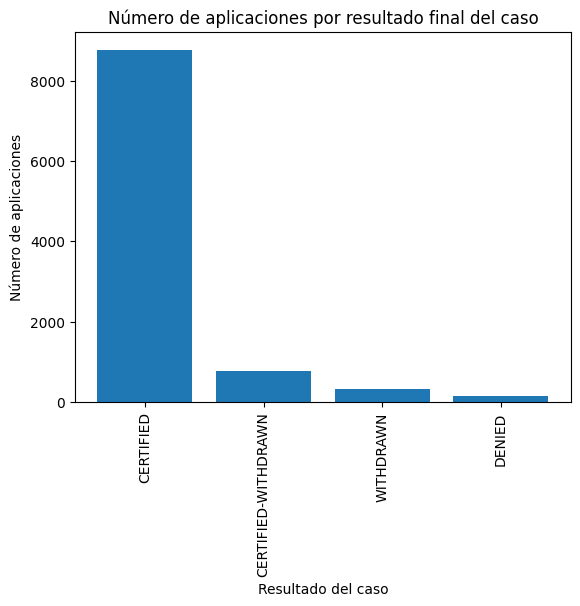

In [15]:
# Gráfico de la variable 'CASE_STATUS'
status_contador = data['CASE_STATUS'].value_counts()
plt.bar(status_contador.index, status_contador.values)
plt.title('Número de aplicaciones por resultado final del caso')
plt.xlabel('Resultado del caso')
plt.ylabel('Número de aplicaciones')
plt.xticks(rotation=90)
plt.show()


La mayoría de solicitudes se encuentran en estado CERTIFICADO (con 8776), le siguen CERTIFICADO-RETIRADO (con 767), RETIRADO (con 314) y DENEGADO (con 143).

De los 10 mil datos, solo un 1.43% de los casos totales son denegados y más de un 87% son certificados, eso significa que hay un gran porcentaje de aceptación para este tipo de visa.

## **Vista de los casos por distribución en el tiempo**

Se explora los resultados durante los meses del año en el 2017, dado que casi la totalidad de los datos que se tienen son de ese año. Se desea observar esta distribución el tiempo para detectar aumentos, disminuciones, comportamientos extraños o patrones.


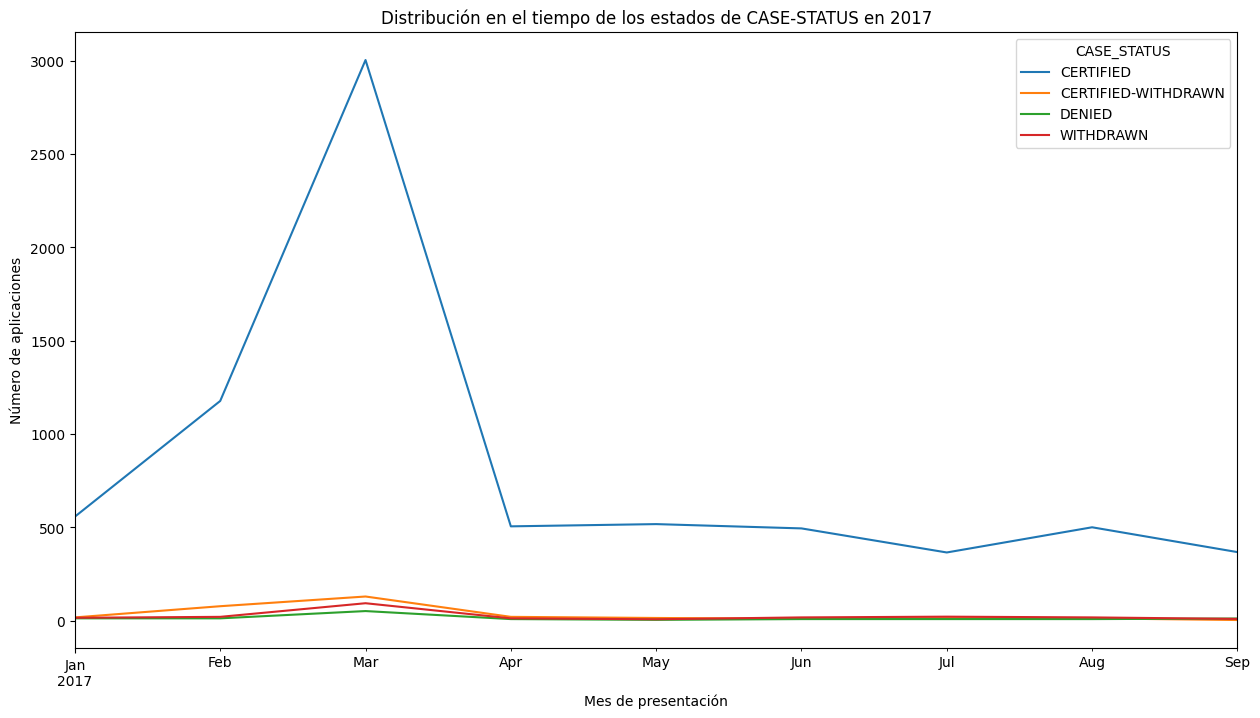

In [16]:
data['CASE_SUBMITTED'] = pd.to_datetime(data['CASE_SUBMITTED'])
data_2017 = data[data['CASE_SUBMITTED'].dt.year == 2017]
estados_pormes = data_2017.groupby([pd.Grouper(key='CASE_SUBMITTED', freq='M'), 'CASE_STATUS'])['CASE_STATUS'].count().unstack('CASE_STATUS')
estados_pormes.plot(kind='line', figsize=(15, 8))
plt.title('Distribución en el tiempo de los estados de CASE-STATUS en 2017')
plt.xlabel('Mes de presentación')
plt.ylabel('Número de aplicaciones')
plt.show()                                                                                                                                
               

Se observa un aumento considerable de las aplicaciones entre los meses Febrero y Marzo, la gran mayoría de estas solicitudes obtienen el valor de 'CERTIFICADO'.

## **Ocupaciones**

A continuación se explorará la variable 'JOB_TITLE' para observar que tipo de empleos realizan la mayor cantidad de solicitudes. 

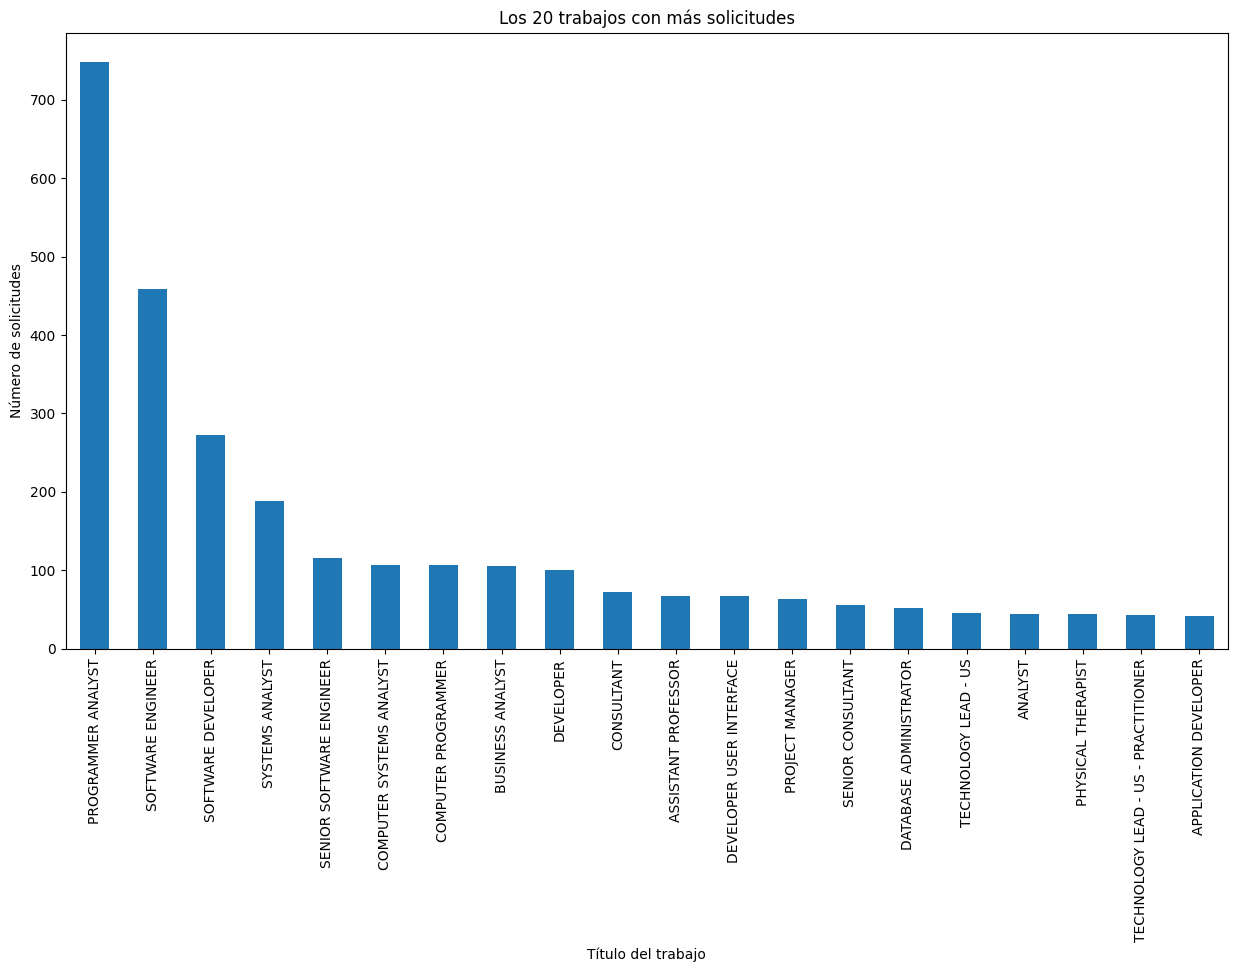

In [17]:
job_contador = data['JOB_TITLE'].value_counts()
job_contador.head(20).plot(kind='bar', figsize=(15, 8))
plt.title('Los 20 trabajos con más solicitudes')
plt.xlabel('Título del trabajo')
plt.ylabel('Número de solicitudes')
plt.show()

Se observa que la mayor cantidad de solicitudes provienen de los campos de la tecnología, siendo Programador analista, Ingeniero de software y Desarrollador de software los empleos más solicitados para visa laboral.

## **Jornada laboral**

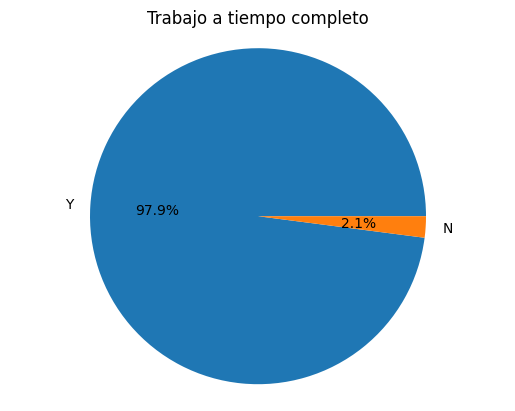

In [18]:
jornada_laboral = data['FULL_TIME_POSITION'].value_counts()
plt.pie(jornada_laboral, labels=jornada_laboral.index, autopct='%1.1f%%')
plt.title('Trabajo a tiempo completo')
plt.axis('equal')
plt.show()

Un 97.9% de las solicitudes son para empleos de tiempo completo.

## **Empresas con más solicitantes**

Se explora las 30 empresas más empleadoras a extranjeros.

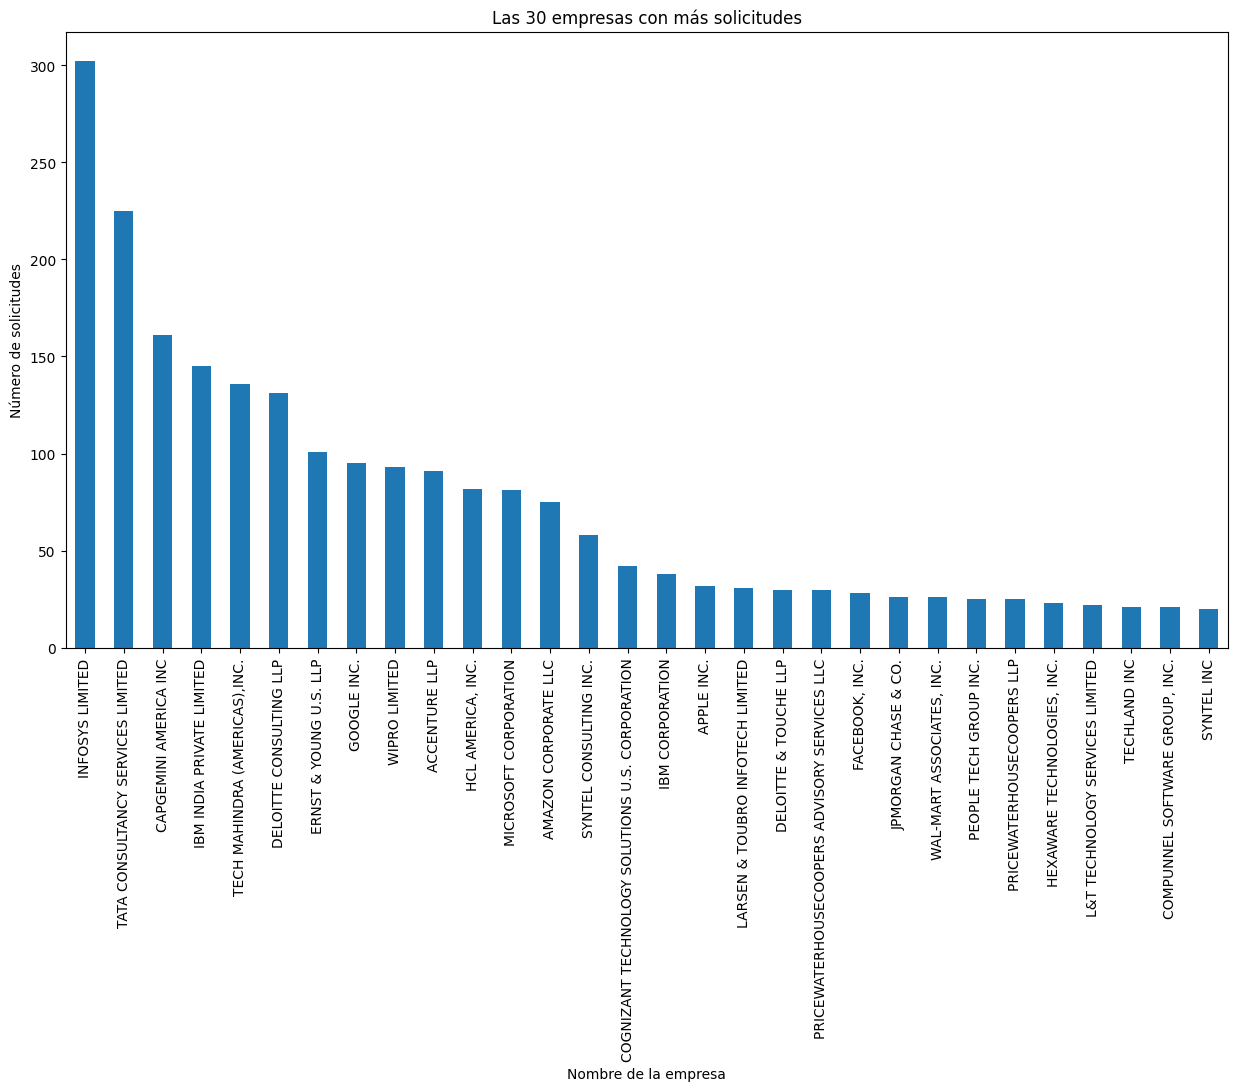

In [19]:
empresas = data['EMPLOYER_NAME'].value_counts()
empresas.head(30).plot(kind = 'bar', figsize = (15,8))
plt.title('Las 30 empresas con más solicitudes')
plt.xlabel('Nombre de la empresa')
plt.ylabel('Número de solicitudes')
plt.show()

Observando este gráfico se encuentra algo interesante, y es que 4 de las 5 empresas con más solicitudes de visa laboral son empresas de India (Infosys, Tata Consultancy, IBM India y Tech Mahindra).

### **Distribución salarial**

Ahora se explora los salarios de las solicitudes que se hacen, para que no hayan valores atípicos en el gráfico solo se van a tomar aquellos salarios que sean anuales.

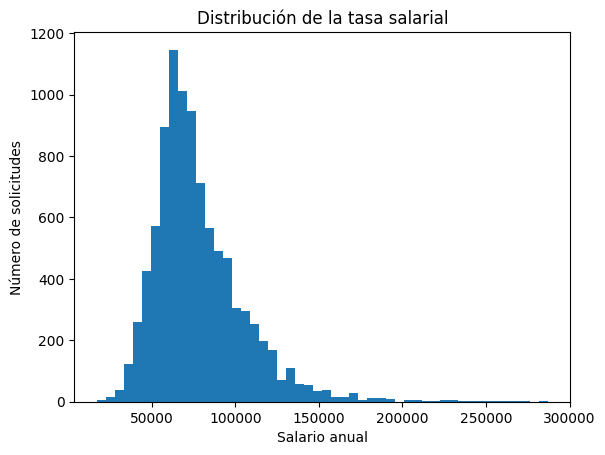

In [20]:
# Filtración para que tome salarios anuales
salario_anual = data[data['PW_UNIT_OF_PAY'] == 'Year']

# Histograma
plt.hist(salario_anual['PREVAILING_WAGE'], bins=50)
plt.title('Distribución de la tasa salarial')
plt.xlabel('Salario anual')
plt.ylabel('Número de solicitudes')
plt.show()


La distribución de la tasa salarial sigue una distribución salarial, con una media ligeramente por encima de los 50 mil dólares anuales. Según la Oficina de Estadísticas Laborales (BLS, por sus siglas en inglés) , el salario medio de los trabajadores en los Estados Unidos es de 54 mil dólares anuales por lo que se puede asegurar que este promedio aplica también para los extranjeros.

**Relación del salario con el resultado del caso**

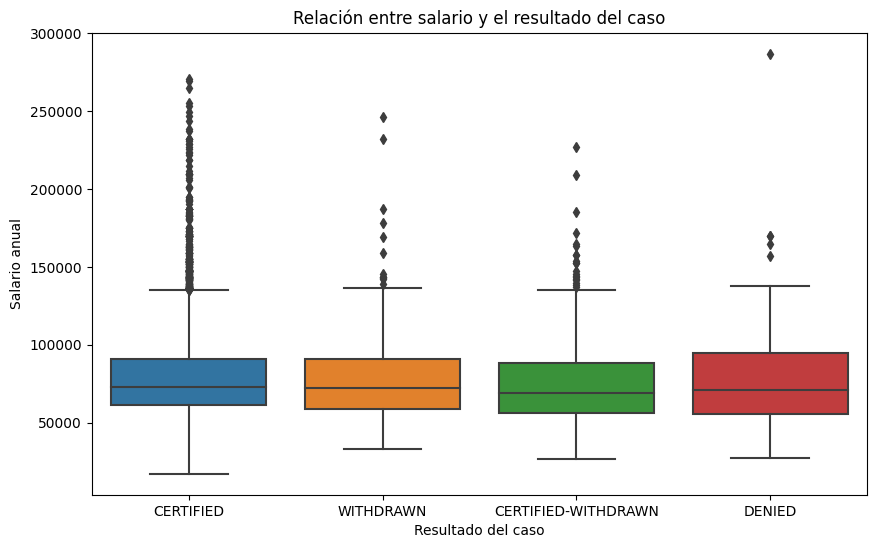

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Relación entre salario y el resultado del caso')
sns.boxplot(x='CASE_STATUS', y='PREVAILING_WAGE', data=data[data['PW_UNIT_OF_PAY']=='Year'])
plt.xlabel('Resultado del caso')
plt.ylabel('Salario anual')
plt.show()       

Mediante este boxplot se puede confirmar que el salario influye en el resultado del caso, se observa que aunque para los 4 posibles resultados la media ronda entre los 50 mil y 100 mil dólares, los valores atípicos del resultado 'CERTITIFICADO' van dese 140 mil (aproximadamente) hasta más de 250 mil dólares anuales, es decir, entre más alto sea el salario, más probable es conseguir una visa laboral en Estados Unidos.

## **Lugar de trabajo**
Por último, se quiere explorar como se distribuyen las solicitudes por estado geográfico.

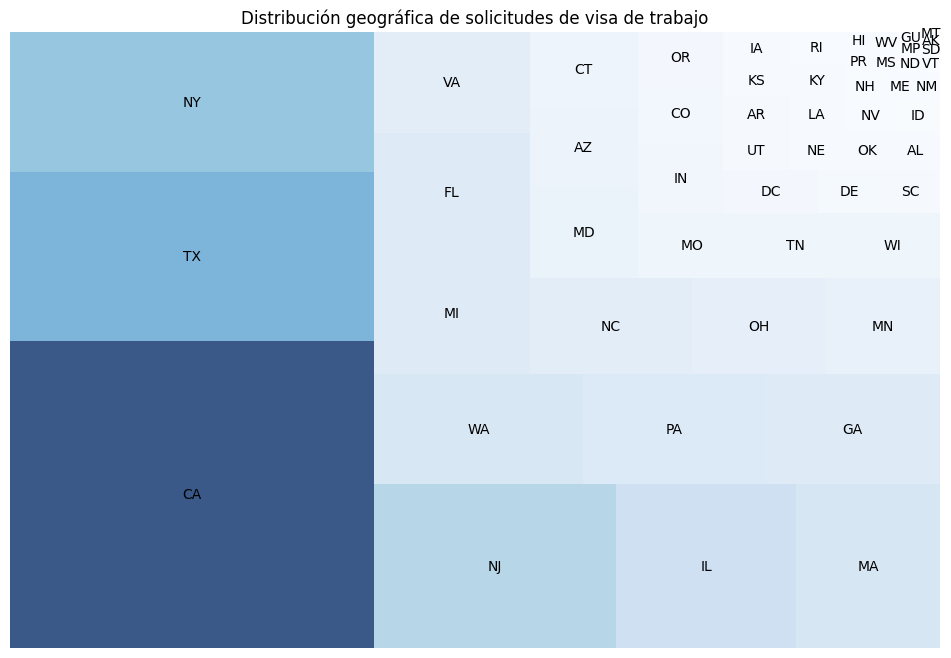

In [28]:
estados = data.groupby('WORKSITE_STATE').size().reset_index(name='counts')
estados = estados.sort_values('counts', ascending=False)  
estados['proporcion'] = estados['counts'] / estados['counts'].sum()

cmap = plt.cm.Blues
mini, maxi = estados['proporcion'].min(), estados['proporcion'].max()
norm = plt.Normalize(vmin=mini, vmax=maxi)
colores = [cmap(norm(value)) for value in estados['proporcion']]
plt.figure(figsize=(12,8))
squarify.plot(sizes=estados['proporcion'], label=estados['WORKSITE_STATE'], color=colores, alpha=.8)
plt.title('Distribución geográfica de solicitudes de visa de trabajo')
plt.axis('off')
plt.show()    

Los estados con mayores solicitudes son California, Texas y Nueva York.